<a href="https://colab.research.google.com/github/Sriharish19/Mobile_price_classification_ml_model/blob/main/SH_Mobile_price_range_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem statement**

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [2]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC




import math

In [3]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the file
df = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')

In [5]:
#Shape
df.shape
print(f'Total Rows = {df.shape[0]}\nTotol Columns={df.shape[1]} ')

Total Rows = 2000
Totol Columns=21 


In [6]:
# first 5 rows
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
# bottom 5 rows
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [8]:
# Duplicates
df.duplicated().sum()

0

In [9]:
# Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# Info
df.info()
# no non-null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Summary
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

Some Basic Observations:
* We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [12]:
# Checking the number of observations having screen width value as 0.
(df['sc_w'].values == 0).sum()

180

In [13]:
# Checking the number of observations having px_height value as 0.
(df['px_height'].values == 0).sum()

2

In [14]:
# As there are only 2 observations having px_height=0. so we will drop it.
df.drop(df[df['px_height'] == 0].index, inplace = True)

In [15]:
# Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
# Numerical variables
df.describe().columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [17]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [18]:
# import KNN imputer frio sklearn
# Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)
# The mismatched values has been imputed

In [19]:
# Checking shape
df.shape

(1998, 21)

In [20]:
# target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

# **EDA( Exploratory Data Analysis)**

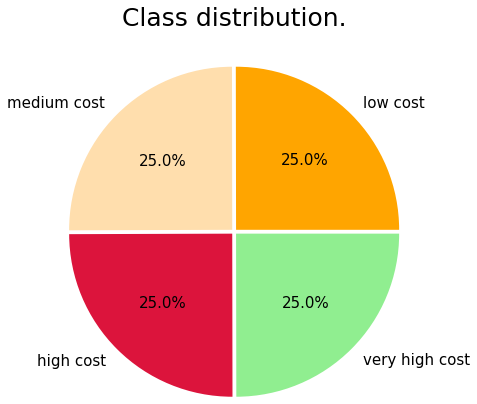

In [21]:
# Visualising class distribution using pie chart

plt.figure(figsize = (5,5))
plt.pie(price_range_values , labels = ["low cost", "medium cost", "high cost", "very high cost"],
        explode = [0.025,0.025,0.025,0.025], 
        colors = ['orange','navajowhite','crimson','lightgreen'], 
        radius = 1.5, textprops = {'fontsize': 15}, autopct = '%0.1f%%' )
plt.title('Class distribution.', fontsize = 25, pad=70)
plt.show()

Observations

* we have almost equal number of obseravtions for each category.
* Thus we don't have imbalanced target variable. 
* Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.
* Accuracy score will be the best evalaution metric for us to select the model.




In [22]:
# Creating a list of columns names
columns=df.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## **Univariate analysis**

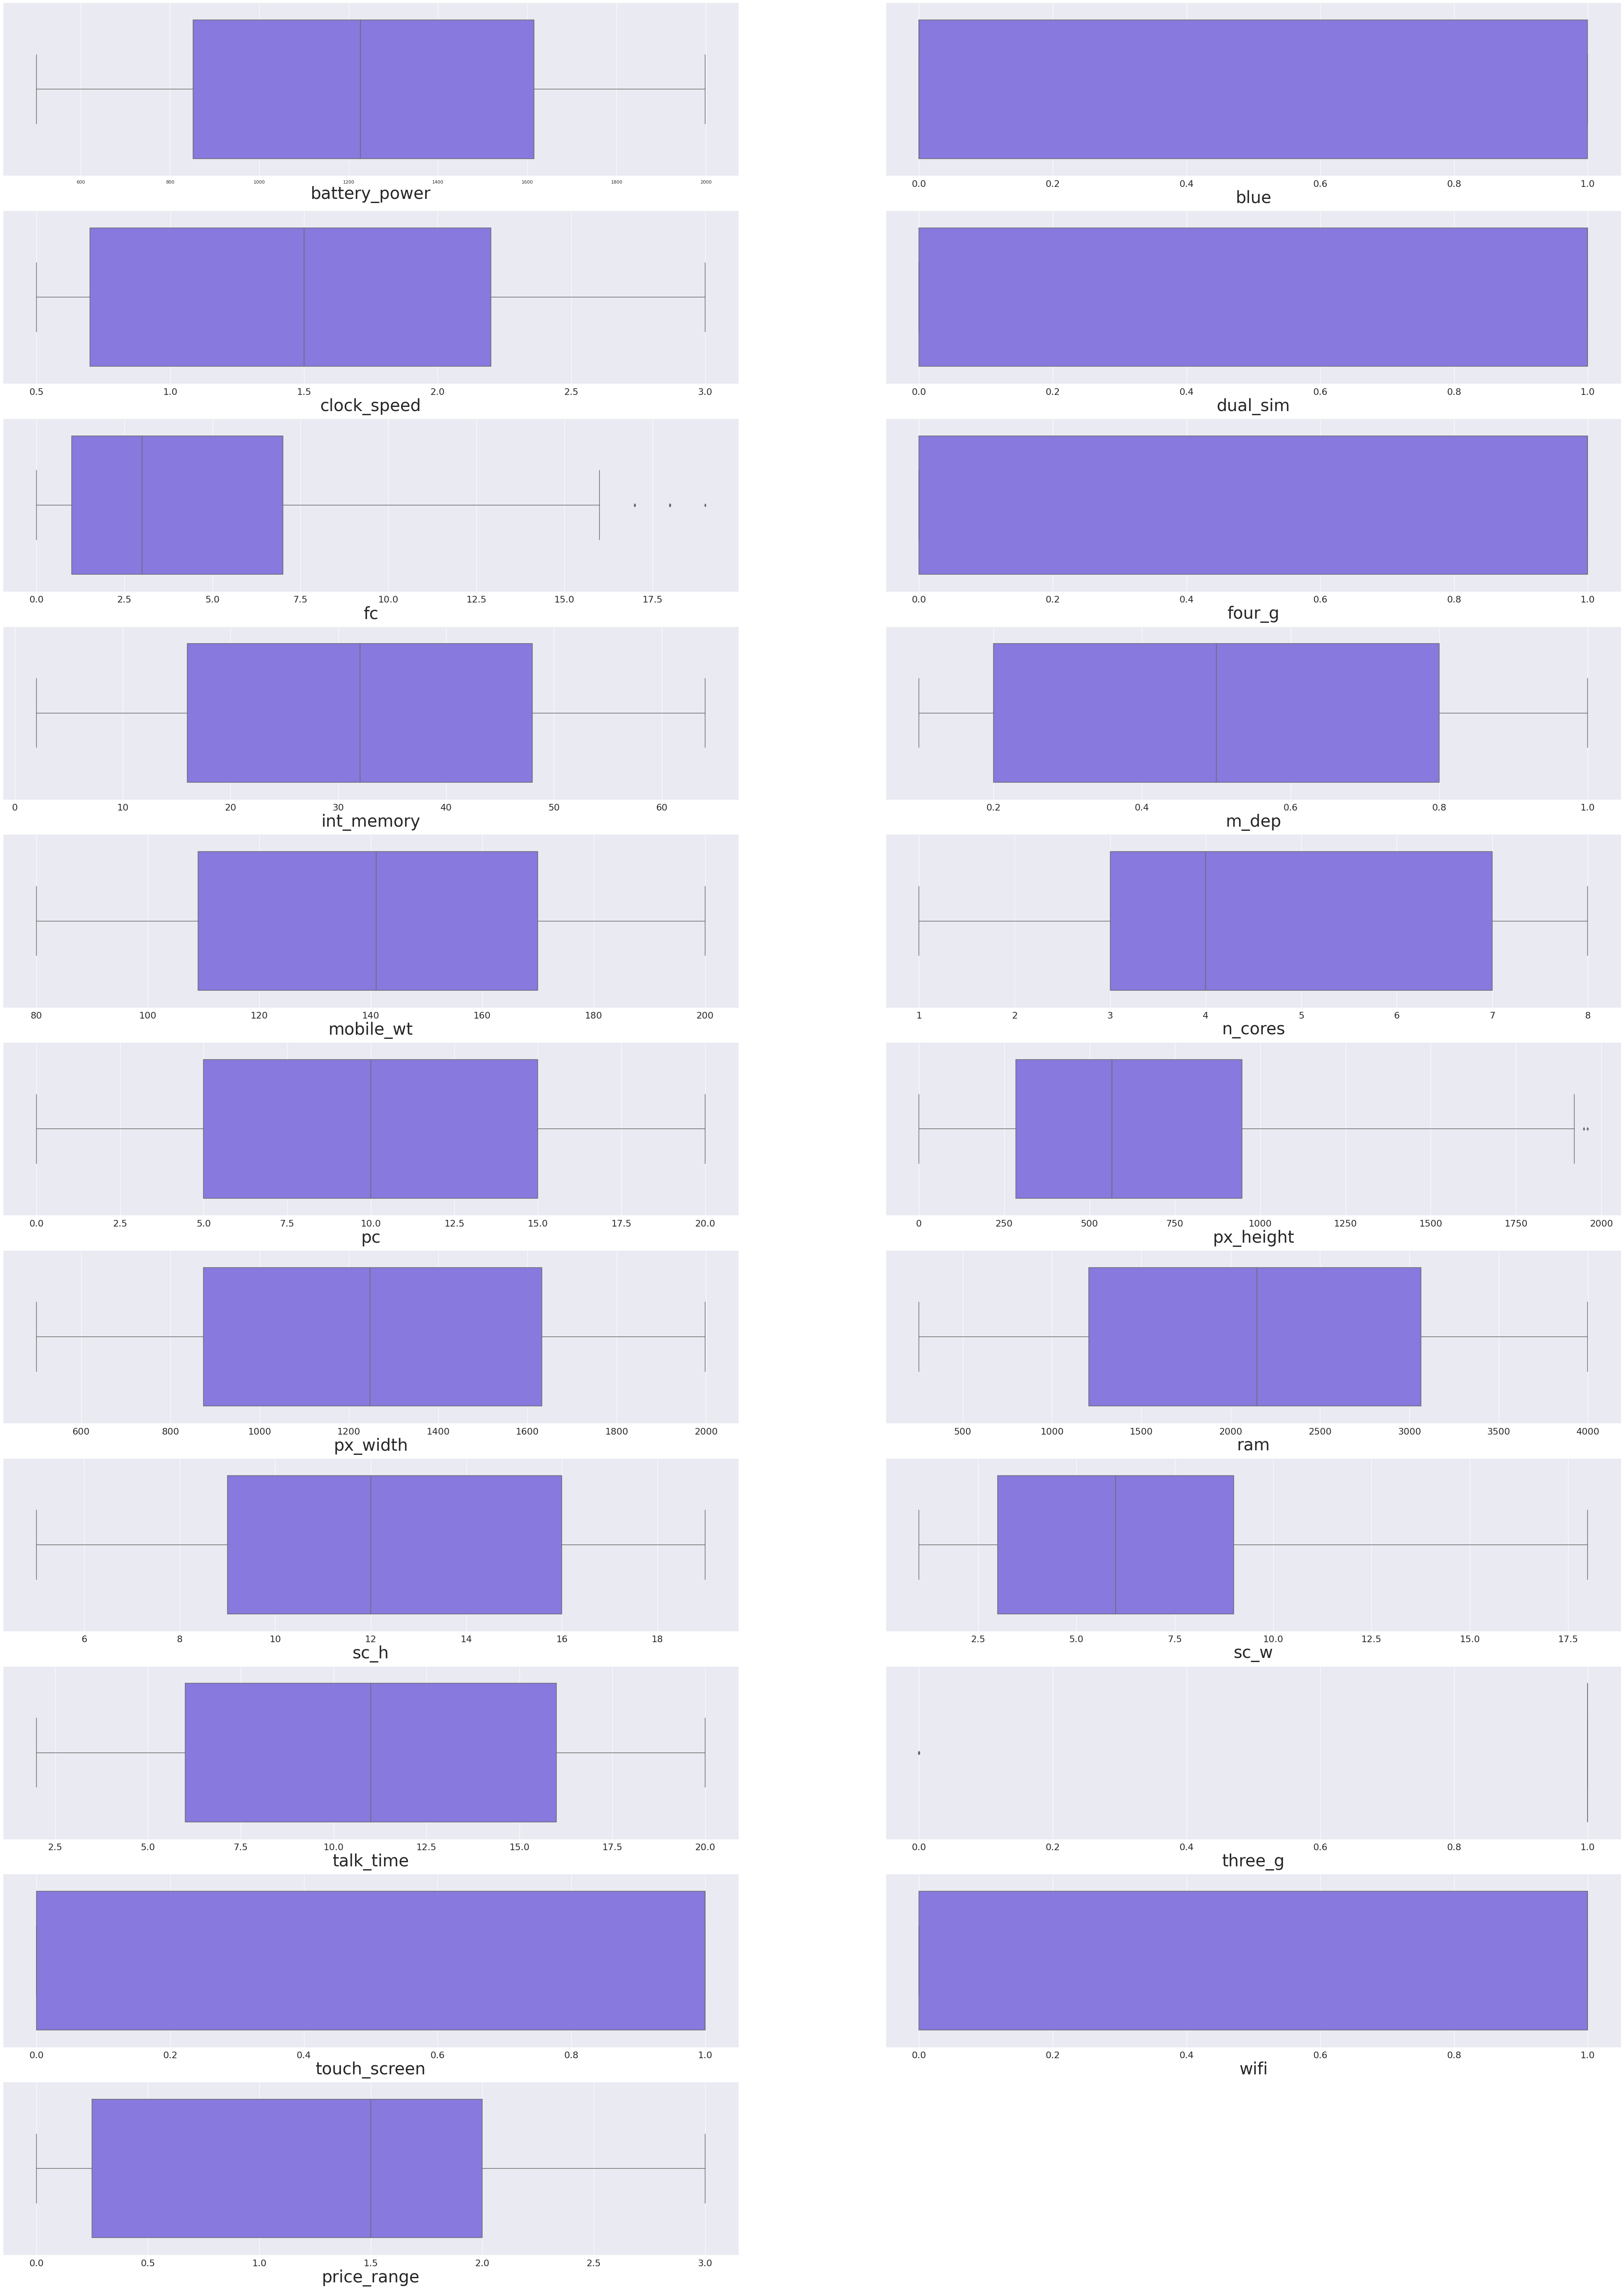

In [23]:
# Box plot to detect outliers

lst_box = columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(11, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='mediumslateblue')
    plt.xlabel(i[1],fontsize=40)

Observation
* The dateset is almost free from outliers 
* The columns 'fc' and 'px_height' are the only two columns that contains outliers

In [24]:
# Outlier detection of fc column
Q1 = df["fc"].quantile(0)
Q3 = df['fc'].quantile(0.992)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [25]:
#Outlier detection of px_height column
Q1 = df["px_height"].quantile(0)
Q3 = df['px_height'].quantile(0.999)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

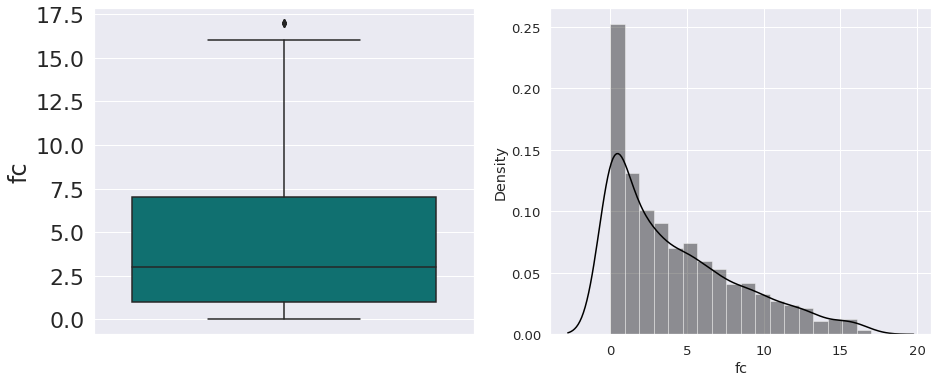

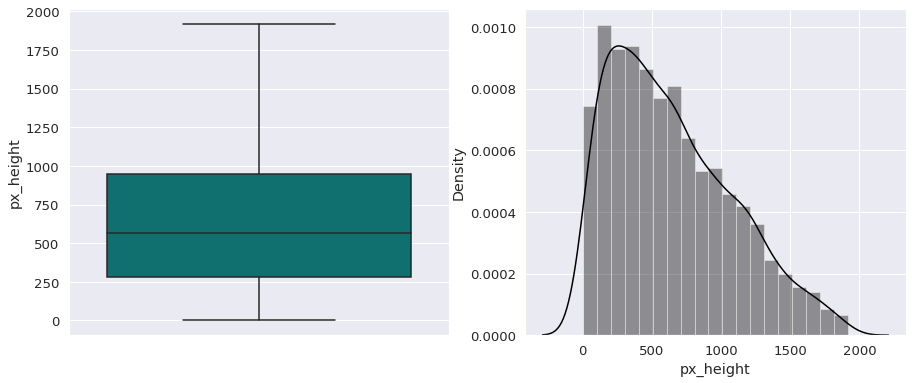

In [26]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.set(font_scale = 1.2)
    fig = sns.boxplot(y=df[var],color='teal')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    sns.set(font_scale = 1.2)
    fig = sns.distplot(df[var],color='black')
    fig.set_xlabel(var)
    plt.show()

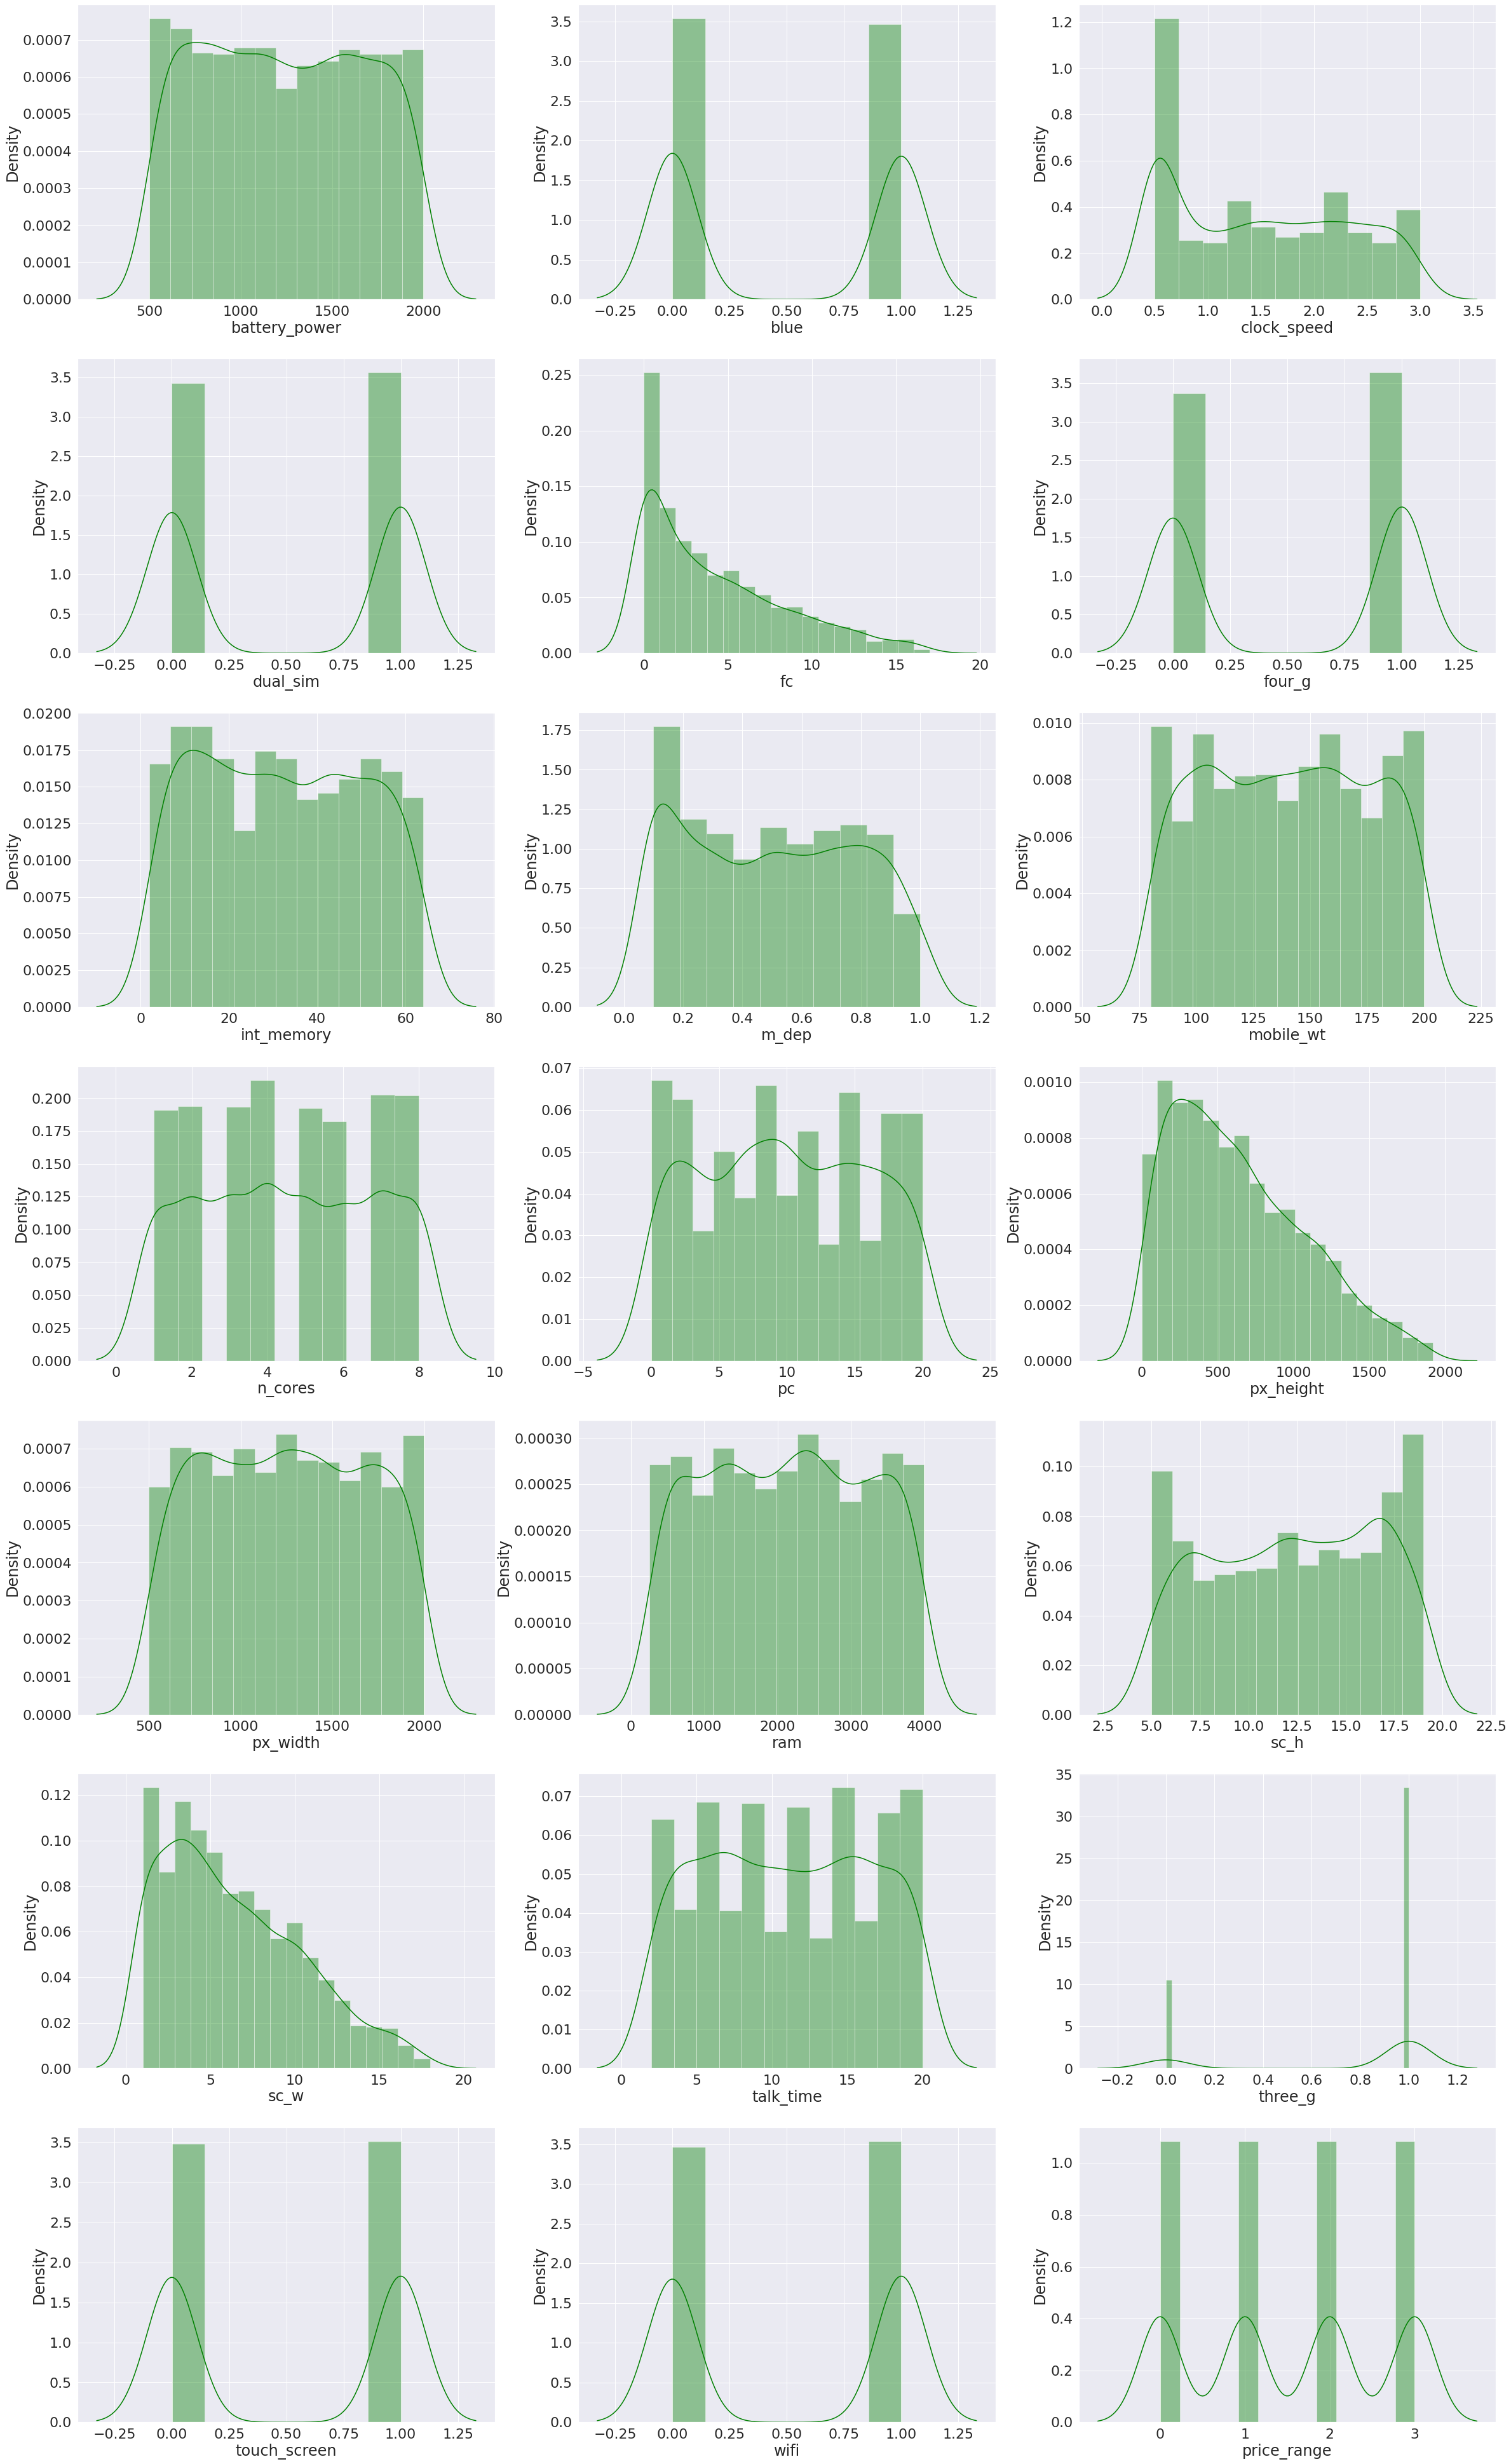

In [27]:
# Distribution plot for numerical variables

lst_dist = columns
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(7, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'green')

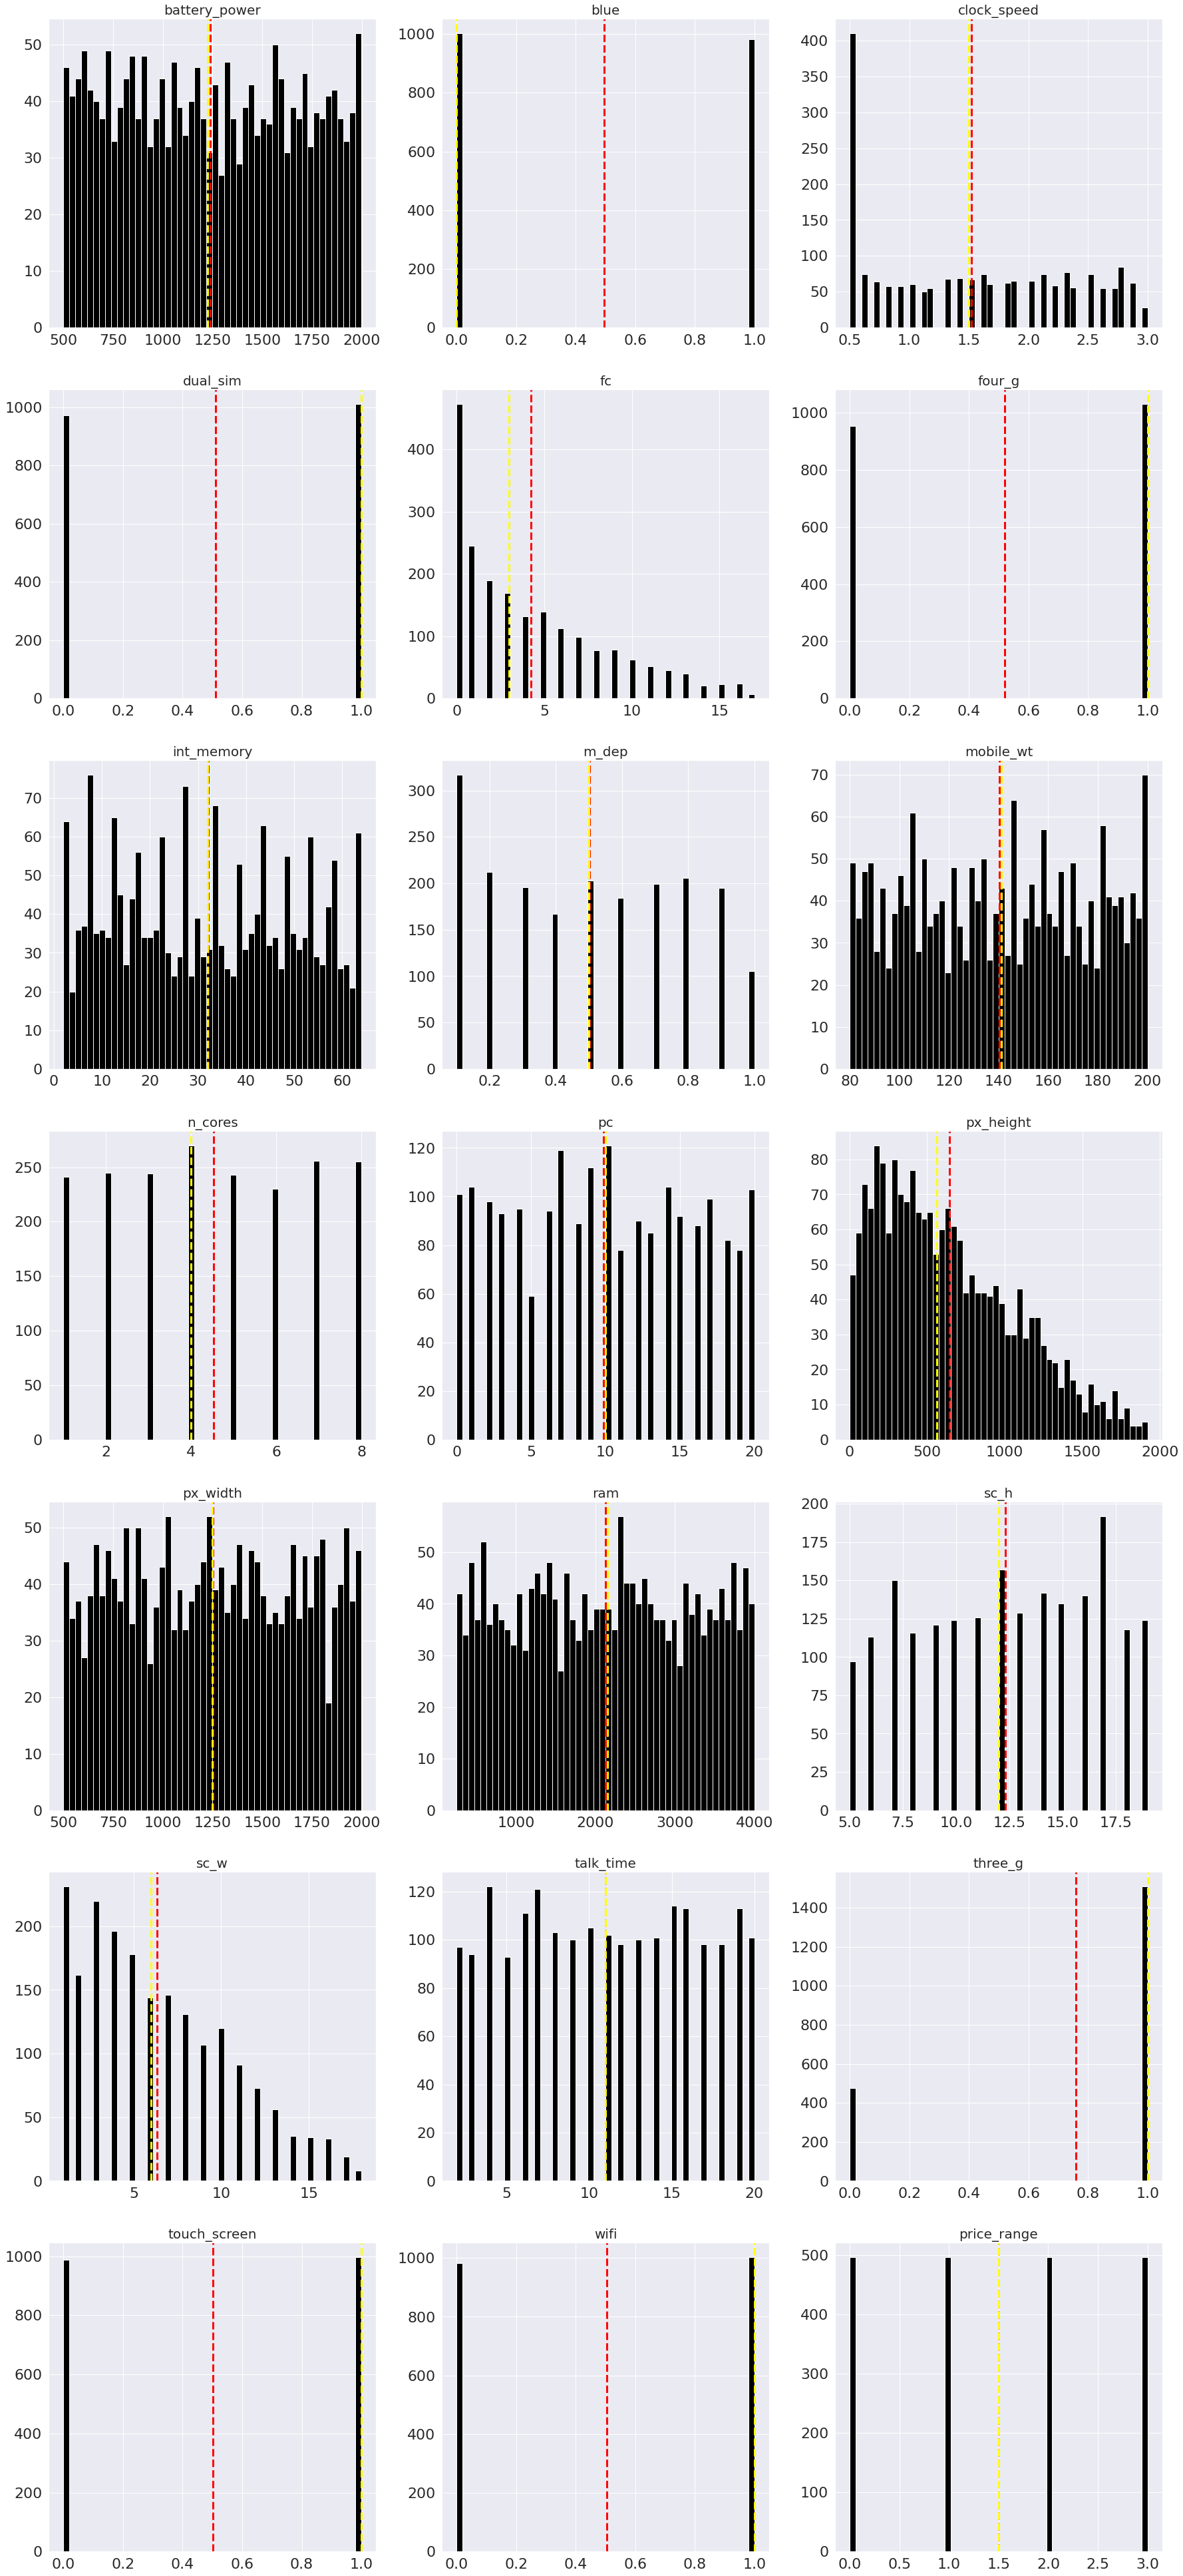

In [30]:
# Calculating mean and median for all the features

plt.figure(figsize = (30,70))

for i in enumerate(columns):
  plt.subplot(7, 3,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'black')
  plt.axvline(feature.mean(),color = 'red',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'yellow',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

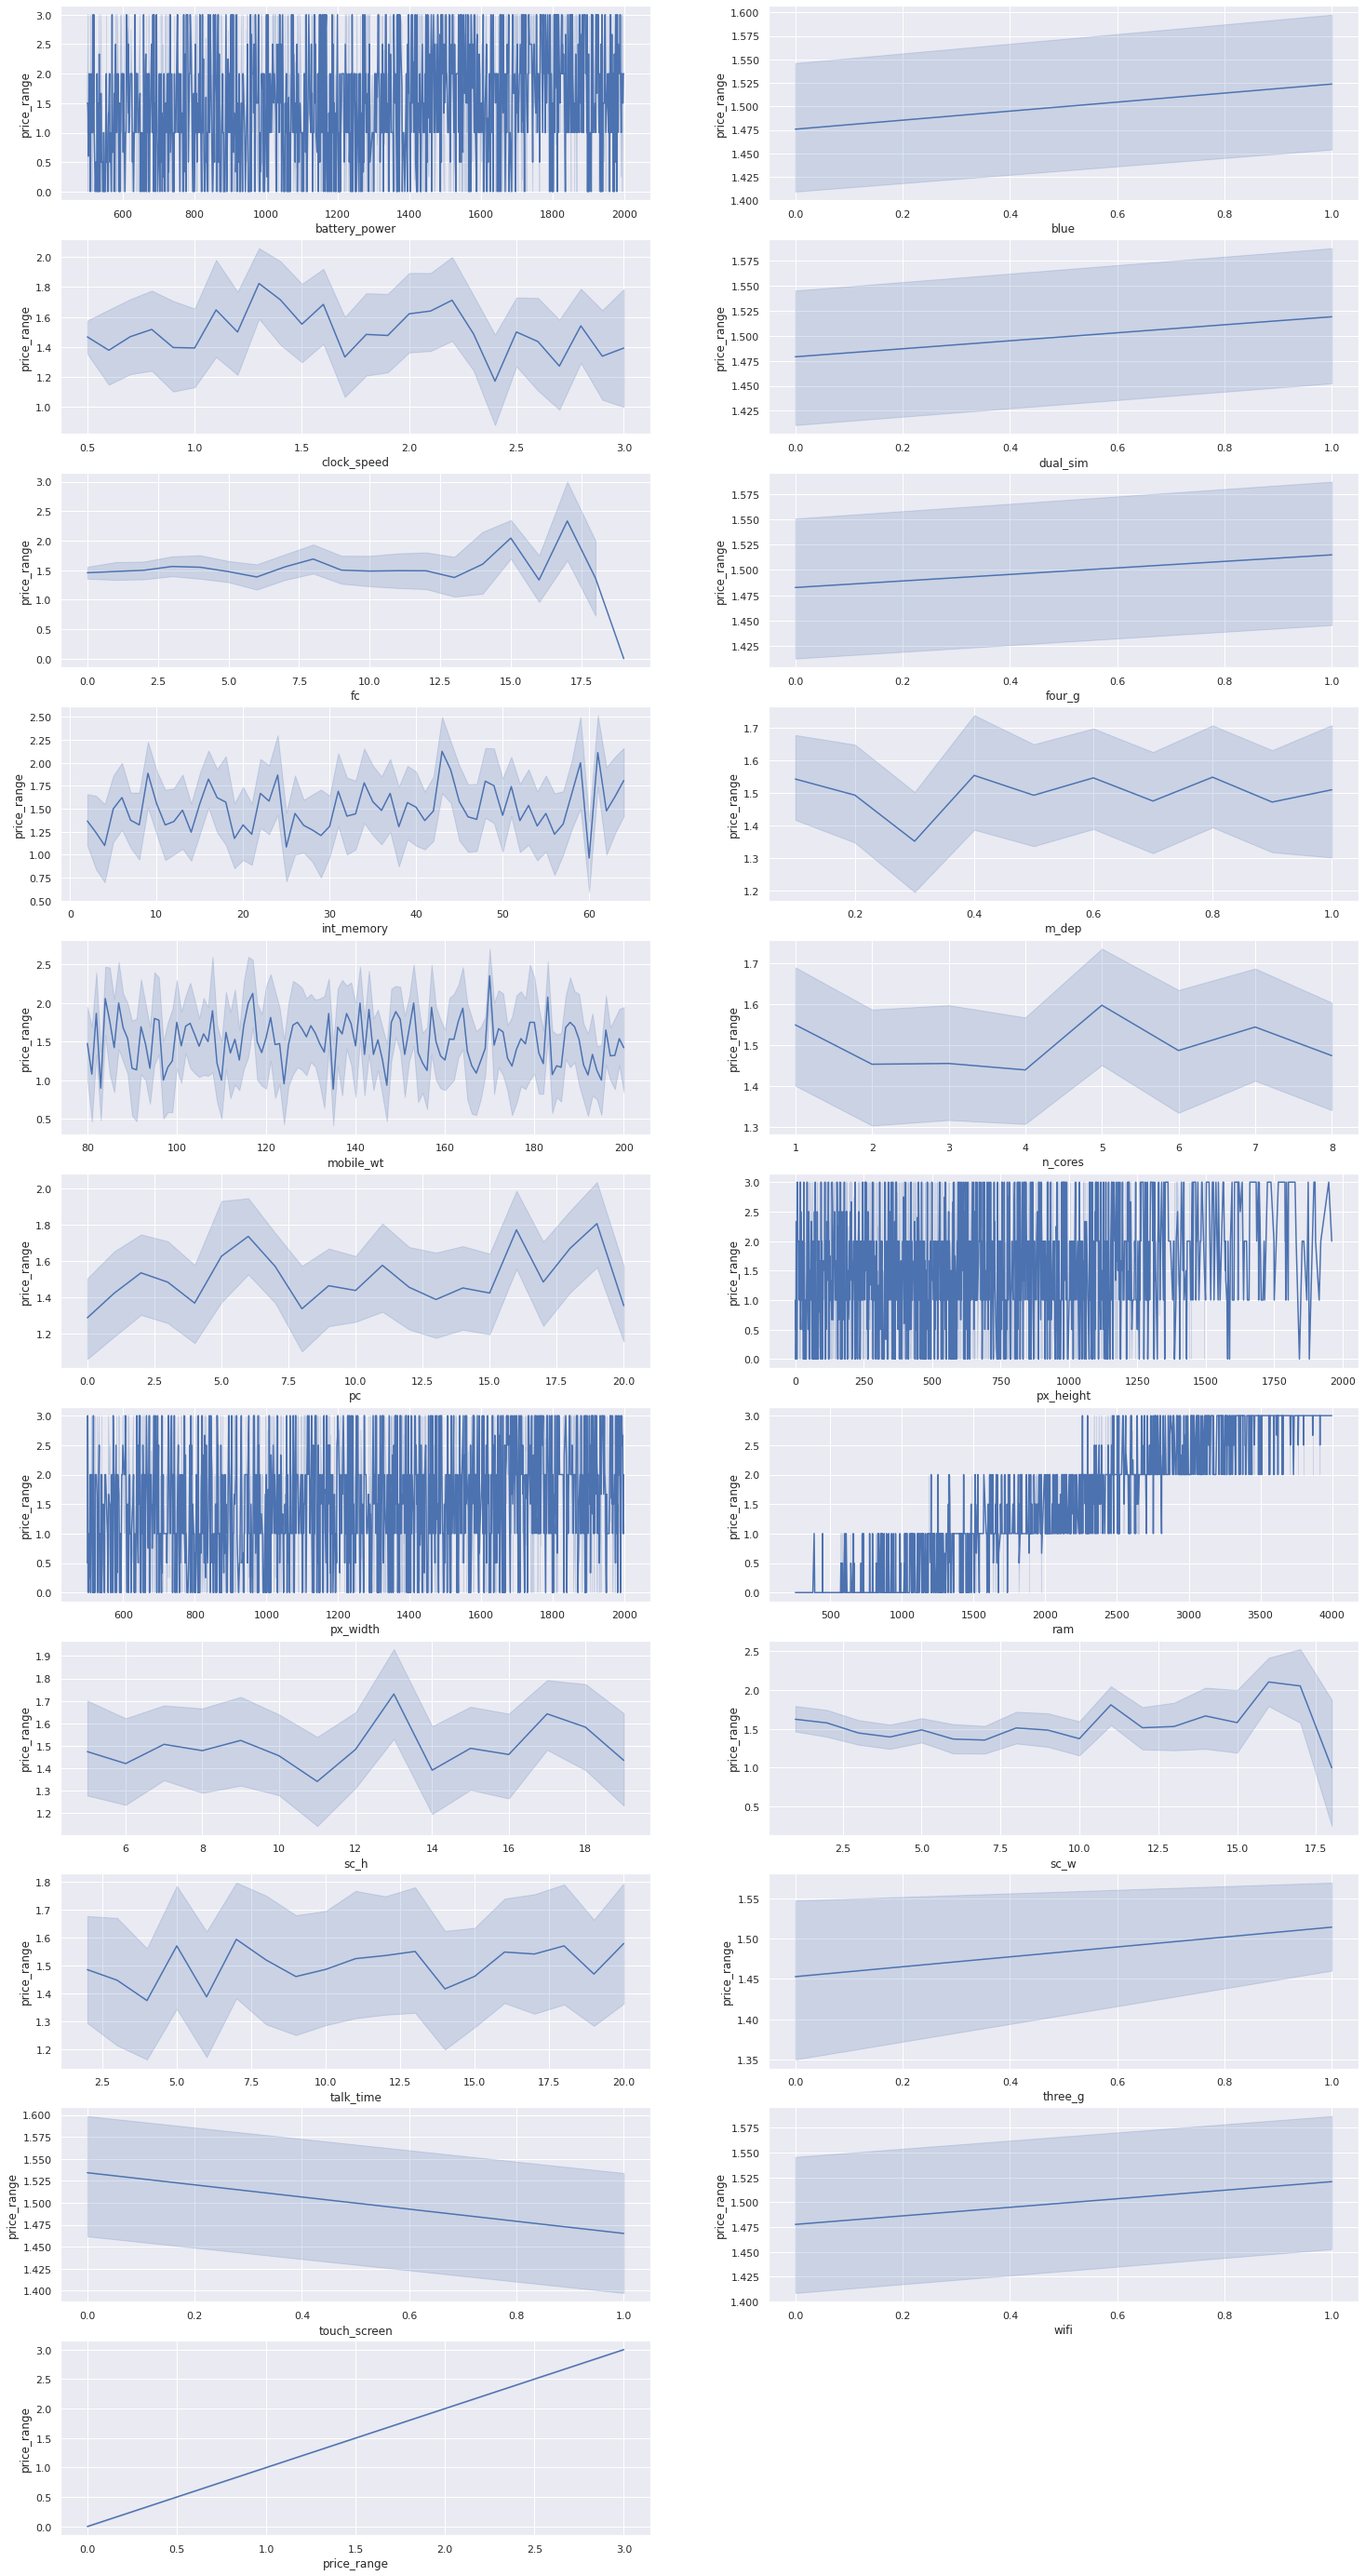

In [ ]:
# line plot for numerical variables

sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 50))
for i in enumerate(columns):
  plt.subplot(11,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='price_range',data=df,palette='Grouped')

### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.*** bold text

## **Multivariate ananlysis**

Text(0.5, 1.0, 'Feature Multicolinearity MAP')

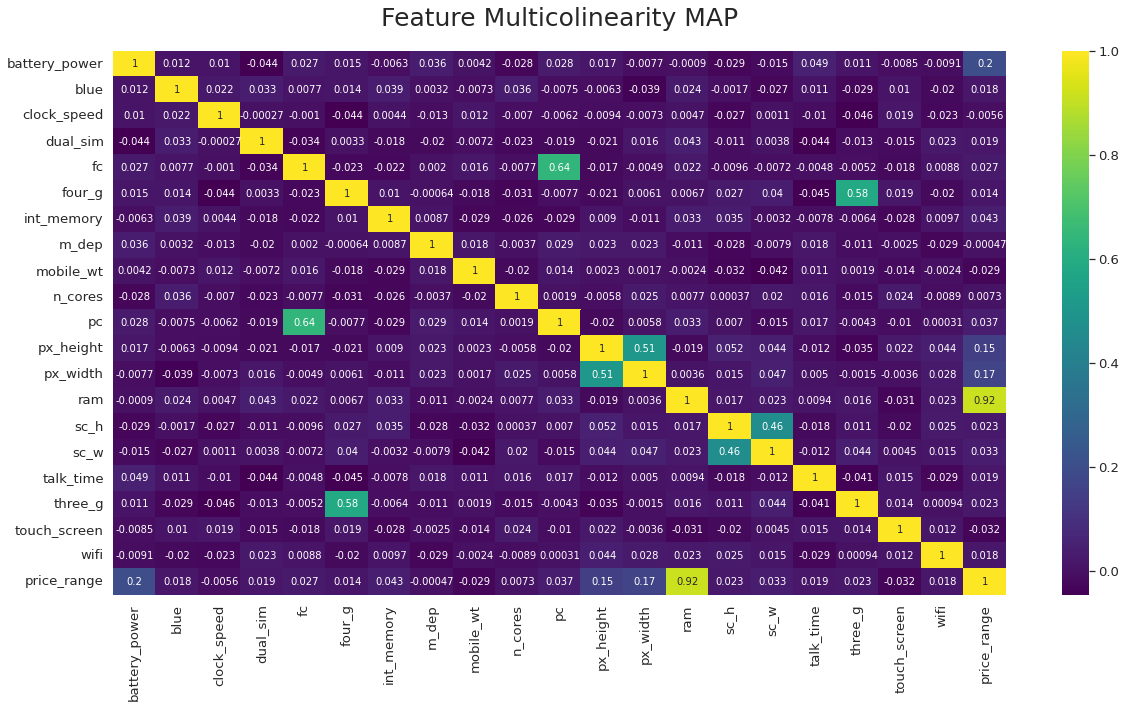

In [31]:
#Multicolinearity

corr= df.corr()
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(corr,annot=True, cmap='viridis',annot_kws={"size": 10})
plt.title('Feature Multicolinearity MAP', fontsize = 25, pad=25)

### **Observations:**
* **RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.**
* **Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.**
* **Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.**

* **Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.**

* **primary camera i.e pc and front camera fc are positively correlated.**
* **sc_h and sc_w are positively correlated.**

In [32]:
#Creating a dataframe of binary categorical variables

bvc=df.loc[:,['blue','dual_sim','four_g','three_g','wifi','touch_screen']]

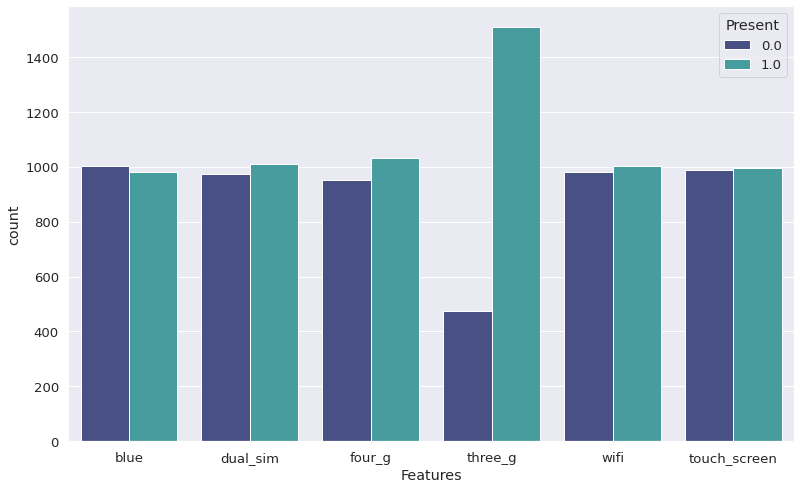

In [33]:
# Countplot for all the binary categorical variables.

dd = bvc.melt(var_name='Features', value_name='Present')
plt.figure(figsize= (13,8))
sns.set(font_scale=1.2)
sns.countplot(x='Features', hue='Present', data=dd,palette='mako')
plt.show()

Observation:

* The number of mobile phones that has bluetooth,dual sim,4g,wifi and touch screen are almost similar to the number of mobiles that does not contain the respective features.

* The 3g distribution among the mobile phones is highly imbalanced .

* The number of mobiles that conatain 3g are very high when compared to mobiles that does not have the feature .




In [34]:
# creating a list object of categorical independant variables
catv=['blue','dual_sim','four_g','three_g','wifi','touch_screen']

In [35]:
# creating a list object to store all column names in the datset 
nuv=df.columns.to_list()

In [36]:
# Creating a list which stores the names of categorical variables and dependant variable
rr=['blue','dual_sim','four_g','three_g','wifi','touch_screen','price_range']

In [37]:
#Using for loop to remove categorical variables and dependant variable
for i in rr:
  nuv.remove(i)

In [38]:
# creating another instance for numeric independant variables
nv=nuv
nv

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

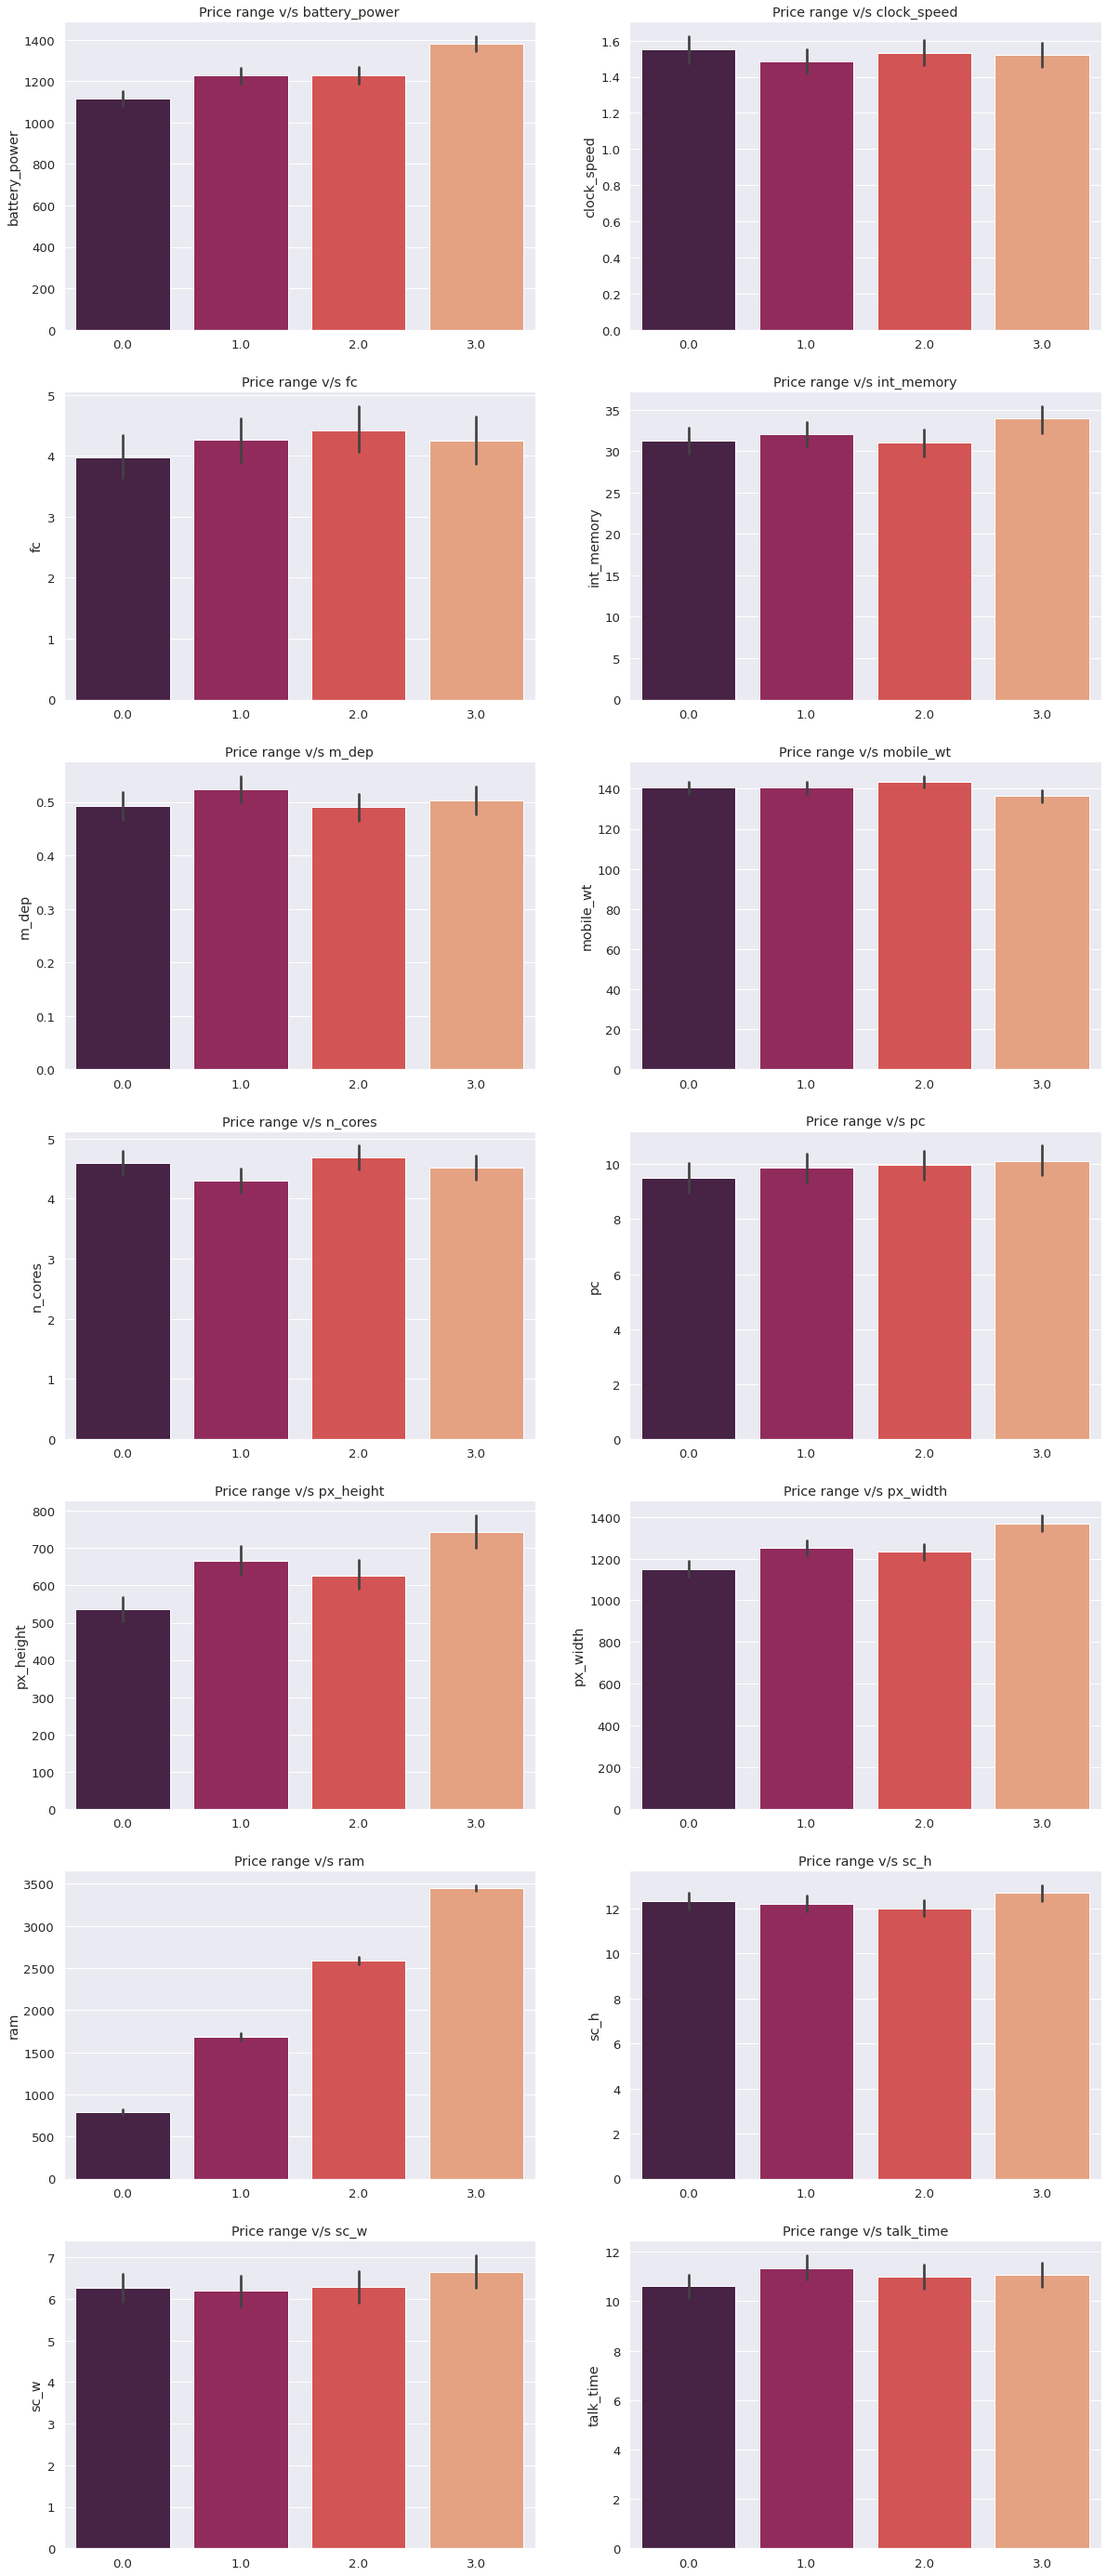

In [39]:
#plotting  price_range vs numerical fearures

plt.figure(figsize=(20,50))
counter=1
for i in nv:
  plt.subplot(7,2,counter)
  sns.set(font_scale=1.2)
  sns.barplot(x=df['price_range'],y=df[i], palette="rocket").set(xlabel=None)
  plt.title(f'Price range v/s {i}')
  counter=counter+1

### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

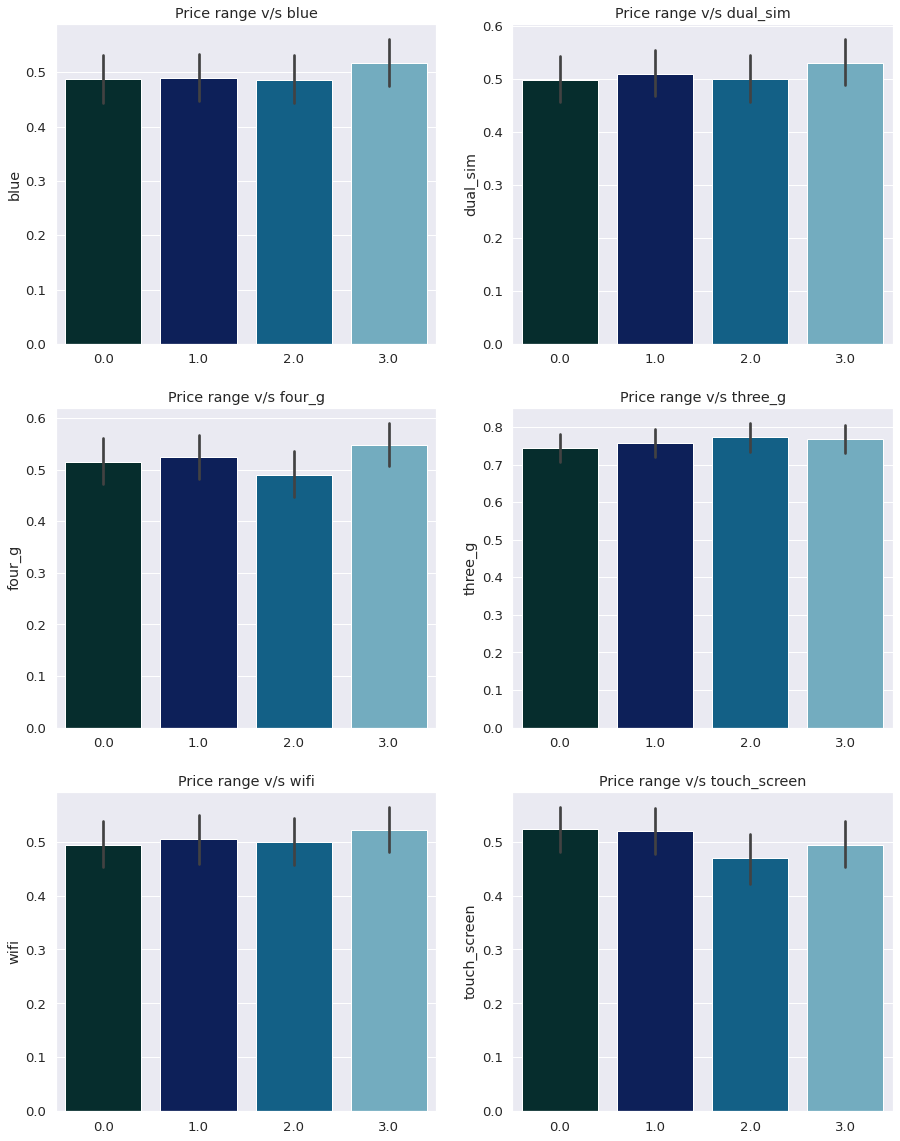

In [40]:
# plotting  price_range vs categorical fearures

plt.figure(figsize=(15,20))
counter=1
for i in catv:
  plt.subplot(3,2,counter)
  sns.set(font_scale=1.2)
  sns.barplot(x=df['price_range'],y=df[i], palette="ocean").set(xlabel=None)
  plt.title(f'Price range v/s {i}')
  counter=counter+1

In [41]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts',
                                                'touch_screen':'value_counts','wifi':'value_counts'}).unstack()
group_by_price


blue      dual_sim      four_g      three_g      touch_screen  \
             0.0  1.0      0.0  1.0    0.0  1.0     0.0  1.0          0.0   
price_range                                                                 
0.0          254  242      249  247    240  256     127  369          236   
1.0          253  243      243  253    236  260     121  375          238   
2.0          255  241      248  248    253  243     113  383          263   
3.0          240  256      233  263    224  272     115  381          251   

                 wifi       
             1.0  0.0  1.0  
price_range                 
0.0          260  251  245  
1.0          258  246  250  
2.0          233  248  248  
3.0          245  237  259

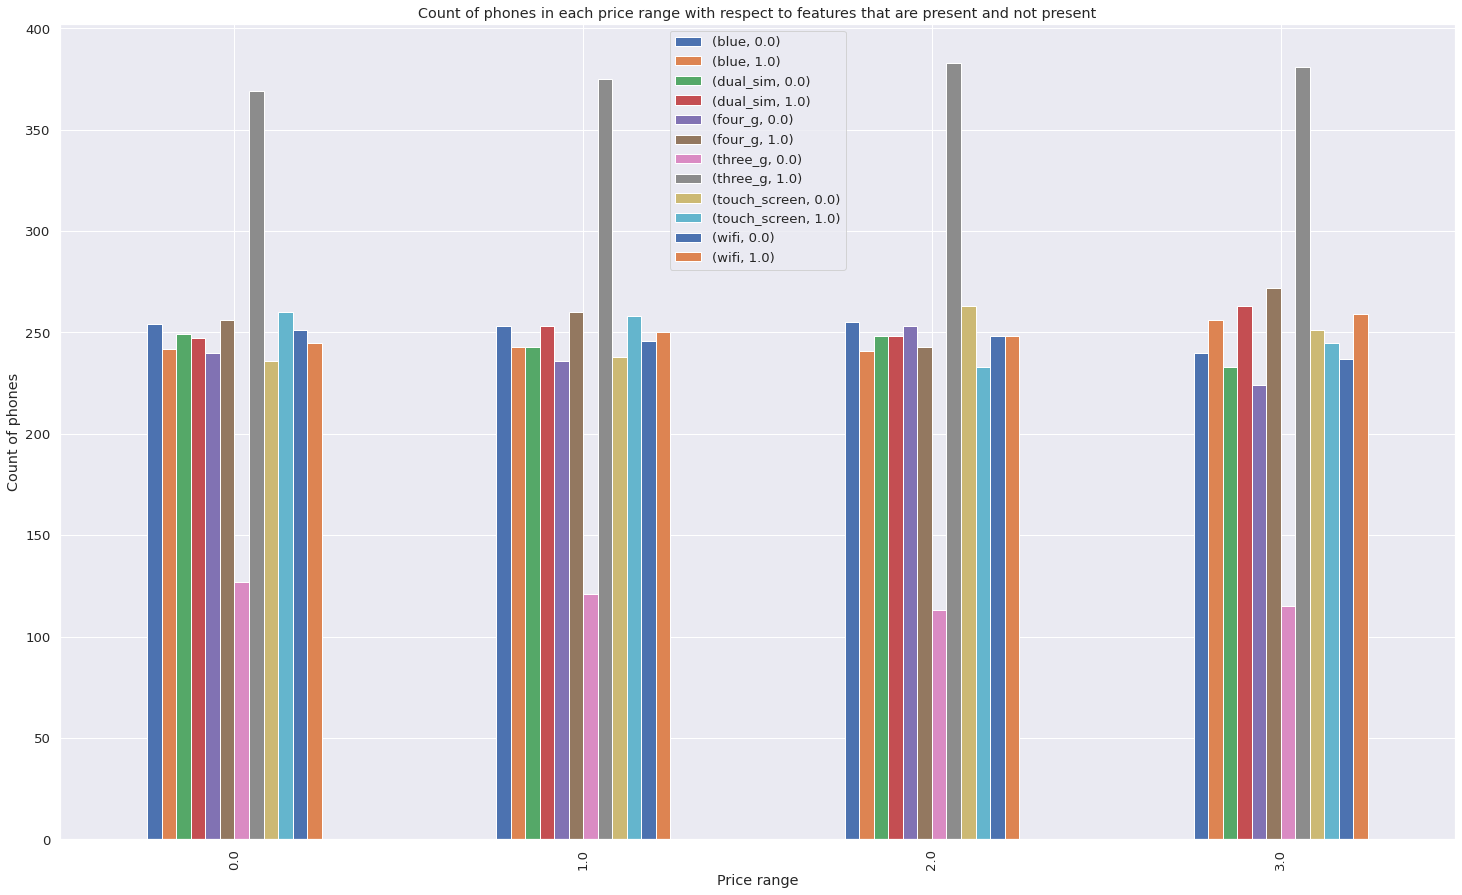

In [42]:
# Ploting graph that displays the Count of phones in each price range with respect to features that are present and not present
group_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with respect to features that are present and not present')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

### **Observations**
 
***We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.***

In [43]:
# creating a list object for independant variables
independent_variables = df.columns.tolist()
independent_variables.remove('price_range')
# independent_variables.remove('Date')

# creating a variable for dependent variable
dependent_variable = ['price_range']
print(independent_variables)
print(dependent_variable)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
['price_range']


In [44]:
# Creating instance for X variables(indpendent variables) and Y(dependent variable) variable.
X=df[independent_variables]
y=df[dependent_variable]

In [45]:
# checking total number of independent variables
len(independent_variables)

20

## **Feature Engineering**

In [ ]:
# # create new colom screen size.
# mobile_data['screen_size']= round(np.sqrt(mobile_data['sc_h']**2+mobile_data['sc_w']**2)/2.54,2)

In [ ]:
# mobile_data['Pixels']=mobile_data['px_height']*mobile_data['px_width']

In [ ]:
# mobile_data.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

In [46]:
#Importing SelectKBest and chi2 for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
#Now we will select top 10 important features 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [48]:
# creating dataframe for storing scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
# concatenating the above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [50]:
# Chi2 score of all the features in the datset
featureScores


Specs          Score
0   battery_power   13999.371116
1            blue       0.606925
2     clock_speed       0.722657
3        dual_sim       0.636004
4              fc      12.608488
5          four_g       1.663434
6      int_memory      82.206604
7           m_dep       0.713873
8       mobile_wt      89.207421
9         n_cores       8.874470
10             pc      10.910471
11      px_height   17480.015686
12       px_width    9711.723426
13            ram  922480.965348
14           sc_h       9.858770
15           sc_w       9.391069
16      talk_time      11.748340
17        three_g       0.318302
18   touch_screen       1.903614
19           wifi       0.435130

In [51]:
# short listing top 10 features with highest chi squared statistic 
z=featureScores.nlargest(10,'Score')
selected_features=z['Specs'].tolist()
selected_features

['ram',
 'px_height',
 'battery_power',
 'px_width',
 'mobile_wt',
 'int_memory',
 'fc',
 'talk_time',
 'pc',
 'sc_h']

In [52]:
# 10 features with highest chi squared statistic are selected as independent variables.
X1=df[selected_features]    # storing the selected independent features in X1
X1

ram  px_height  battery_power  px_width  mobile_wt  int_memory    fc  \
0     2549.0       20.0          842.0     756.0      188.0         7.0   1.0   
1     2631.0      905.0         1021.0    1988.0      136.0        53.0   0.0   
2     2603.0     1263.0          563.0    1716.0      145.0        41.0   2.0   
3     2769.0     1216.0          615.0    1786.0      131.0        10.0   0.0   
4     1411.0     1208.0         1821.0    1212.0      141.0        44.0  13.0   
...      ...        ...            ...       ...        ...         ...   ...   
1993   668.0     1222.0          794.0    1890.0      106.0         2.0   0.0   
1994  2032.0      915.0         1965.0    1965.0      187.0        39.0   0.0   
1995  3057.0      868.0         1911.0    1632.0      108.0        36.0   1.0   
1996   869.0      336.0         1512.0     670.0      145.0        46.0   4.0   
1997  3919.0      483.0          510.0     754.0      168.0        45.0   5.0   

      talk_time    pc  sc_h  
0          19.0   2.0   9.0  
1           7.0   6.0  17.0  
2           9.0   6.0  11.0  
3          11.0   9.0  16.0  
4          15.0  14.0   8.0  
...         ...   ...   ...  
1993       19.0  14.0  13.0  
1994       16.0   3.0  11.0  
1995        5.0   3.0   9.0  
1996       19.0   5.0  18.0  
1997        2.0  16.0  19.0  

[1984 rows x 10 columns]

In [ ]:
# creating a class list
#Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']



# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) Gradient Boosting Classifier
* 4) K-nearest Neighbour classifier
* 5) Logistic Regression
* 6) Support Vector Classifier(SVc)


In [53]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')

In [54]:
# Defining a function to standardize and then perform fit and transform print the test and train accuracy.
# Reusable code
# plot confusion matrix,roc,auc plots
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4) #train test split

    #scaling and performing fit and transform
    sc=StandardScaler() 
    X_train=sc.fit_transform(X_train)         # fitting the X_train
    X_test=sc.transform(X_test)               # transforming the X_train
    model=ml_model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)         # predicted y on test data
    y_train_pred=model.predict(X_train)       # predicted y on train data

    # Ploting confusion matrix
    cf_matrix=confusion_matrix(y_test,y_test_pred)
    Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']
    
    # Accuracy scores for test and train data
    print(f'Train set accuracy score of is {accuracy_score(y_train,y_train_pred)}')
    print(f'Test set accuracy score of  is {accuracy_score(y_test,y_test_pred)}')
    print('')

    # Printing classification report     
    print(f'Classification report') 
    print('')
    print(classification_report(y_train,y_train_pred))
    print(classification_report(y_test,y_test_pred))

    #Ploting confusion matrix
    plot_confusion_matrix(ml_model,X_test,y_test,cmap='cividis')
    plt.grid(False)
    plt.title('Confusion Matrix-test dataset',fontsize=15)
    plt.show()

    #ploting Auc and roc curves
    pred_prob = ml_model.predict_proba(X_test)
    plot_Auc_roc(y_test,pred_prob)

    

In [ ]:
# Feature importance for linear models

def feature_importance_plot(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''

  # train test split and scaling of data
  X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.5,random_state=4) 
  sc=StandardScaler()
  X1_train=sc.fit_transform(X_train)
  X1_test=sc.transform(X_test)
  algo.fit(X1_train,y_train) 
  imp_fe=pd.Series(abs(algo.coef_[0])+abs(algo.coef_[1])+abs(algo.coef_[2])+abs(algo.coef_[3]),index=X_train.columns).nlargest(12).reset_index()
  imp_fe.rename(columns = {'index':'Feature', 0:'score'}, inplace = True)
  #Figure plotting
  plt.figure(figsize=(12,8))
  sns.set(font_scale = 1.3)
  sns.barplot(x = 'score',y = 'Feature',data = imp_fe,palette='Spectral')
  plt.title('Feature Importance',fontdict= { 'fontsize': 24})

In [ ]:
#Feature importance for tree based algorithms 

def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # train test split and scaling of data
  X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.5,random_state=4)
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)
  model=algo.fit(X_train,y_train)
  importance = algo.feature_importances_
  #creating a data frame with feature names and respective scores
  feat_importance=pd.DataFrame({'Features':X1.columns,'score':importance}).sort_values(by='score',ascending=False) # columns are sorted based on feature importance
  # Figure plotting
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'],palette='Dark2')
  plt.title('Feature Importance')

In [55]:
# Implementing models for predction

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8400503778337531

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       296
         1.0       1.00      1.00      1.00       290
         2.0       1.00      1.00      1.00       308
         3.0       1.00      1.00      1.00       296

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90       200
         1.0       0.78      0.82      0.80       206
         2.0       0.76      0.79      0.77       188
         3.0       0.90      0.89      0.89       200

    accuracy                           0.84       794
   macro avg       0.84      0.84      0.84       794
weighted avg       0.84      0.84      0.84       794



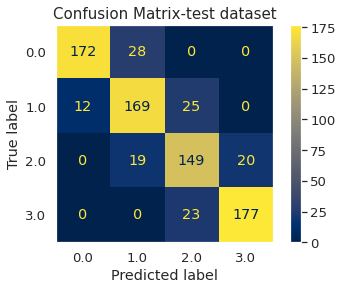

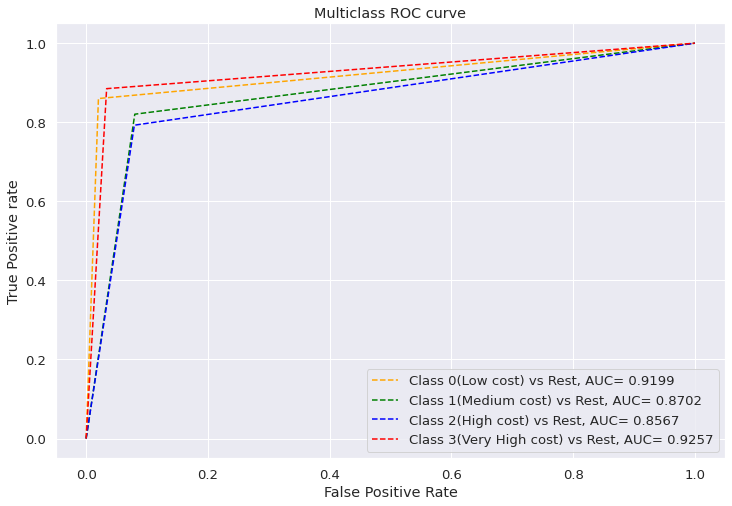

In [56]:
predict(DecisionTreeClassifier(),X1,y)

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8967254408060453

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       296
         1.0       1.00      1.00      1.00       290
         2.0       1.00      1.00      1.00       308
         3.0       1.00      1.00      1.00       296

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       200
         1.0       0.85      0.87      0.86       206
         2.0       0.83      0.87      0.85       188
         3.0       0.96      0.92      0.94       200

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



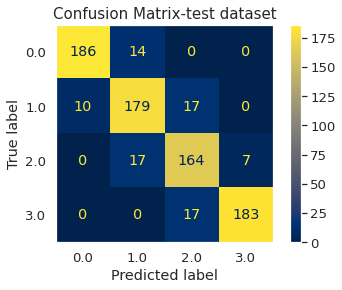

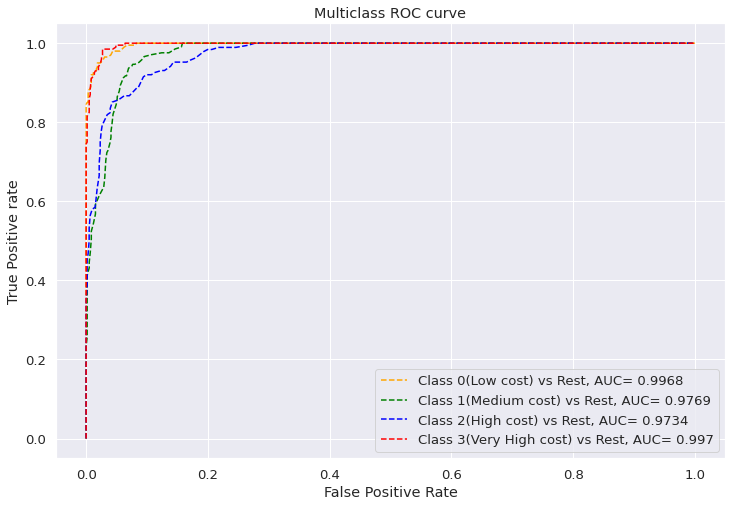

In [57]:
predict(RandomForestClassifier(),X1,y)

Train set accuracy score of is 0.8117647058823529
Test set accuracy score of  is 0.6574307304785895

Classification report

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.87       296
         1.0       0.71      0.73      0.72       290
         2.0       0.76      0.78      0.77       308
         3.0       0.94      0.83      0.89       296

    accuracy                           0.81      1190
   macro avg       0.82      0.81      0.81      1190
weighted avg       0.82      0.81      0.81      1190

              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76       200
         1.0       0.52      0.52      0.52       206
         2.0       0.53      0.58      0.56       188
         3.0       0.88      0.73      0.80       200

    accuracy                           0.66       794
   macro avg       0.67      0.66      0.66       794
weighted avg       0.67      0.66      0.66       794



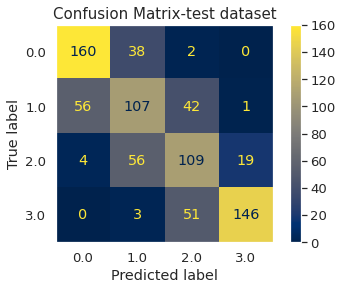

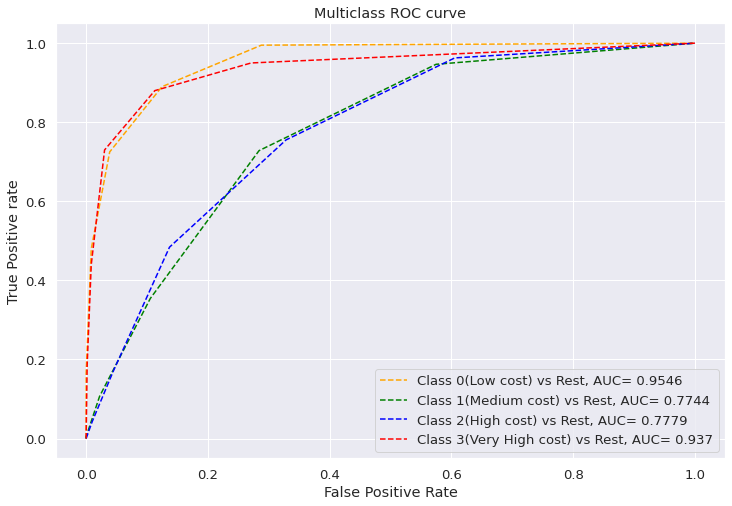

In [59]:
predict(KNeighborsClassifier(),X1,y)

Train set accuracy score of is 0.9773109243697479
Test set accuracy score of  is 0.9559193954659949

Classification report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       296
         1.0       0.97      0.97      0.97       290
         2.0       0.97      0.95      0.96       308
         3.0       0.98      0.99      0.98       296

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       200
         1.0       0.95      0.95      0.95       206
         2.0       0.93      0.94      0.93       188
         3.0       0.97      0.96      0.96       200

    accuracy                           0.96       794
   macro avg       0.96      0.96      0.96       794
weighted avg       0.96      0.96      0.96       794



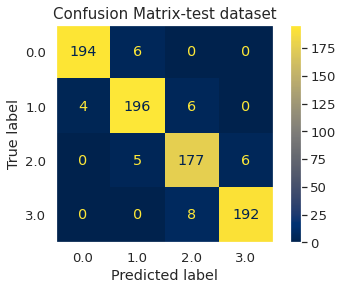

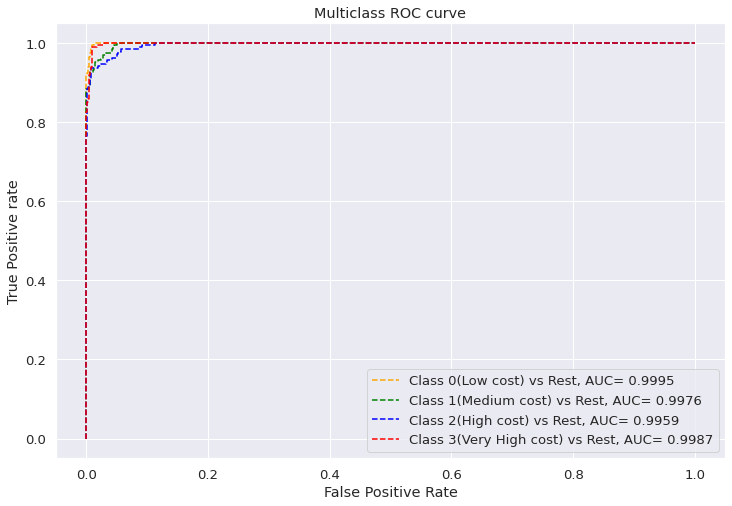

In [61]:
predict(LogisticRegression(),X1,y)

Train set accuracy score of is 0.9823529411764705
Test set accuracy score of  is 0.8954659949622166

Classification report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       296
         1.0       0.98      0.97      0.97       290
         2.0       0.97      0.98      0.97       308
         3.0       0.99      0.99      0.99       296

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       200
         1.0       0.86      0.88      0.87       206
         2.0       0.80      0.90      0.85       188
         3.0       0.97      0.89      0.93       200

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



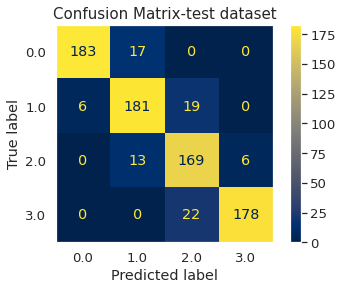

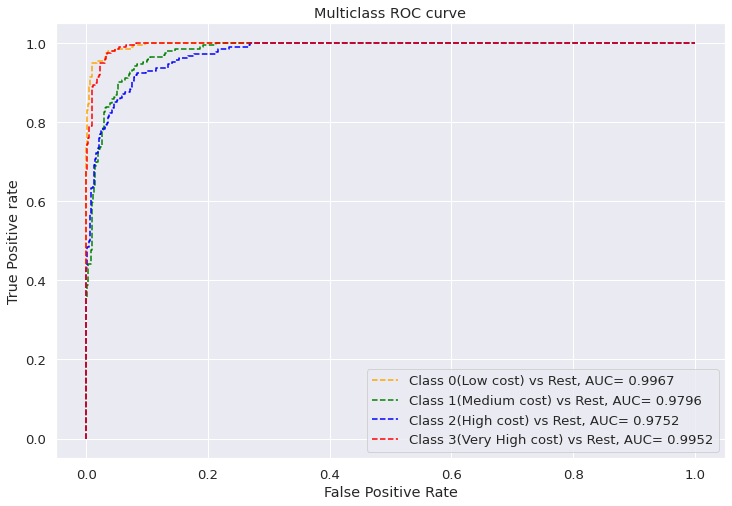

In [60]:
predict(SVC(probability=True),X1,y)

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8967254408060453

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       296
         1.0       1.00      1.00      1.00       290
         2.0       1.00      1.00      1.00       308
         3.0       1.00      1.00      1.00       296

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       200
         1.0       0.88      0.86      0.87       206
         2.0       0.81      0.90      0.85       188
         3.0       0.96      0.89      0.92       200

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



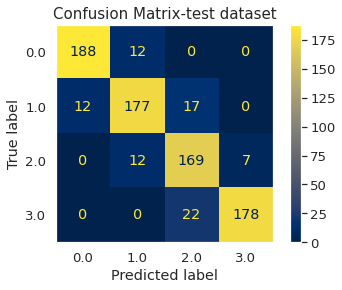

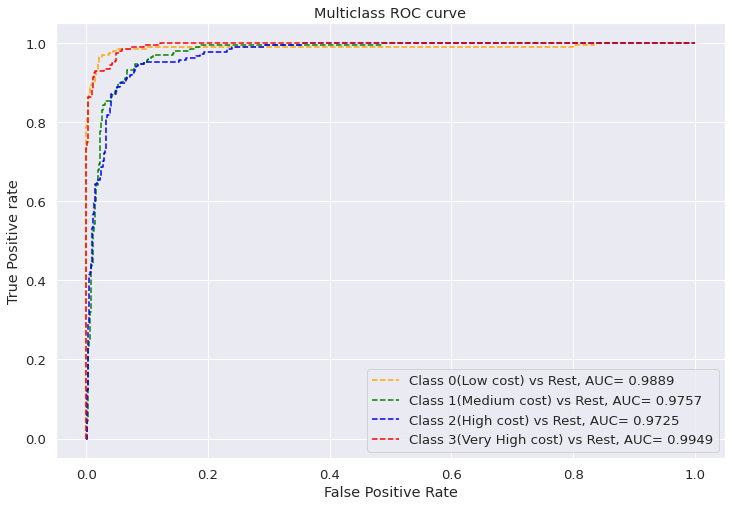

In [58]:
predict(GradientBoostingClassifier(),X1,y)

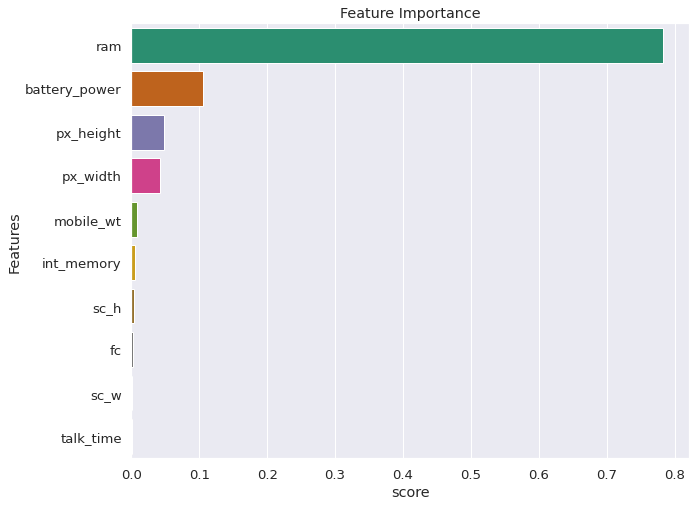

In [ ]:
#Feature importance graph of Logistic regression model
plot_feature_importance(GradientBoostingClassifier())

 Observations:

* We have experimented our dataset on various tree based models and linear based models.

* Accuracy score of Decision tree Classifier       : 84 %
* Accuracy score of Random forest Classifier       : 89 %
* Accuracy score of Gradient Boosting Classifier   : 89 %
* Accuracy score of KNN Classifier                 : 65 %
* Accuracy score of SVC Classifier                 : 89 %
* Accuracy score of Logistic Regression            : 95 %


* From the above predictions we can come to the conclusions that linear models like SVC and Logistic models are performing well with high accuracy scores.

* Now we can move forward and perform hyperparameter tuning for these models to achieve maximum possible accuracy scores.

## **Hyper parameter tuning**

In [ ]:
# Scaling the data.
# creating an object of Standard Scaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test

In [ ]:
# grid_values = {'C': [0.1,1,10,100,1000,2000],
#                'penalty': ['l1', 'l2','elasticnet'],
#                    'solver':['newton-cg', 'lbfgs']}


Hyperparameter tuning for Logistic regression

In [ ]:
# Creating a dictionary of hyperparameter values for grid search cv
grid_values = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
log_cv = GridSearchCV(LogisticRegression(), grid_values, cv =5,verbose=2)

log_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Streaming output truncated to the last 5000 lines.
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=2)

In [ ]:
# getting the best estimators
log_cv.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='none',
                   solver='sag')

In [ ]:
# getting the best parameters
log_cv.best_params_

{'C': 4.281332398719396, 'max_iter': 1000, 'penalty': 'none', 'solver': 'sag'}

In [ ]:
# Hyper parameter tuned values for Logistic regression
Log_optimal=LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='none', solver='sag')

Train set accuracy score of is 0.9865092748735245
Test set accuracy score of  is 0.9709595959595959

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       297
         1.0       0.98      0.98      0.98       306
         2.0       0.98      0.98      0.98       294
         3.0       0.99      0.99      0.99       289

    accuracy                           0.99      1186
   macro avg       0.99      0.99      0.99      1186
weighted avg       0.99      0.99      0.99      1186

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       199
         1.0       0.98      0.93      0.96       188
         2.0       0.95      0.97      0.96       202
         3.0       0.98      0.99      0.98       203

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



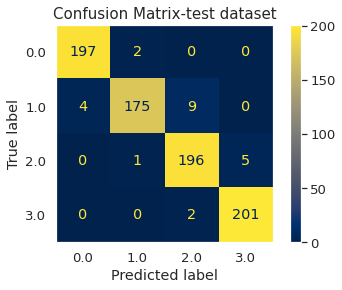

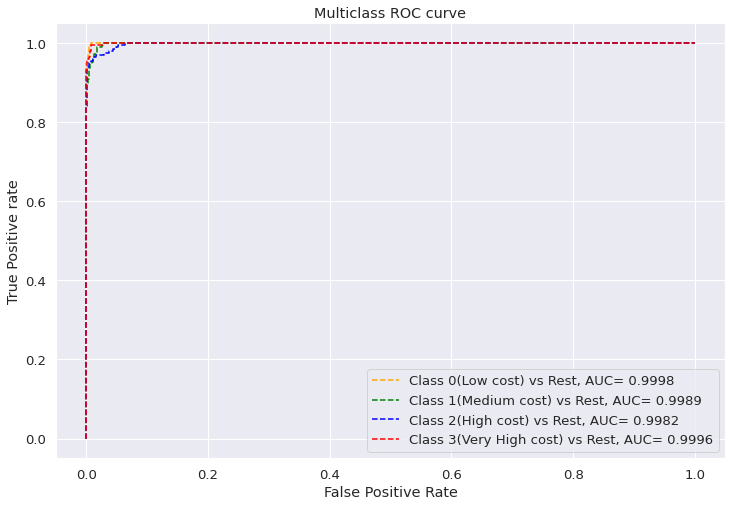

In [ ]:
#Hyperparameter tuned
predict(Log_optimal,X1,y)

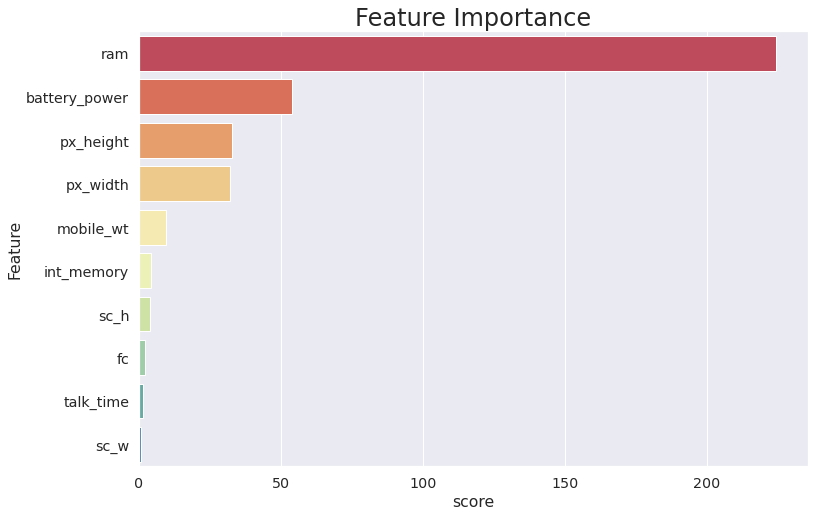

In [ ]:
#Feature importance graph of Logistic regression model
feature_importance_plot(Log_optimal)

### **Observations** - **Logistic regression**


* ***Accuracy score on train set is 97% and Test score is 95%.***
***Model is neither overfitted nor underfitting as the differance between train and test accuracy score is just 2% .**
* ***After Hyperparameter tuning train accuracy increased to 98.6 % and test accuracy score increased to 97%.*** 
*  ***Logistic regression performed the best when compared to other models taht were experimented.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***

Hyperparameter tuning of SVC

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
    }

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(SVC (), grid_values, cv = 5,verbose=2)

svm_cv.fit(X_train_scaled,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
#Hyperparameter tuned svc model
svc_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)

Train set accuracy score of is 0.9806070826306914
Test set accuracy score of  is 0.9671717171717171

Classification report

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       297
         1.0       0.97      0.97      0.97       306
         2.0       0.97      0.97      0.97       294
         3.0       0.99      0.99      0.99       289

    accuracy                           0.98      1186
   macro avg       0.98      0.98      0.98      1186
weighted avg       0.98      0.98      0.98      1186

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       199
         1.0       0.97      0.93      0.95       188
         2.0       0.95      0.97      0.96       202
         3.0       0.98      0.99      0.98       203

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



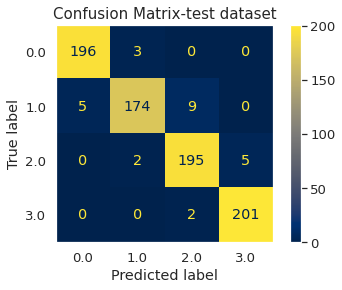

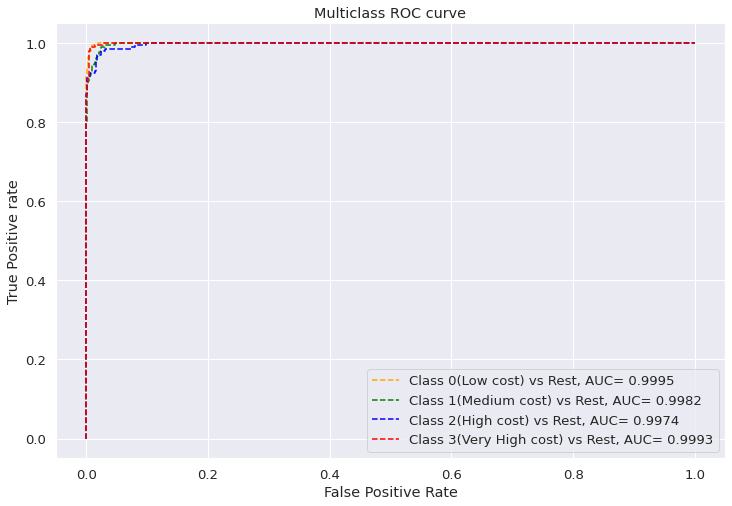

In [ ]:
#Hyperparameter tuned
predict(svc_optimal,X1,y)

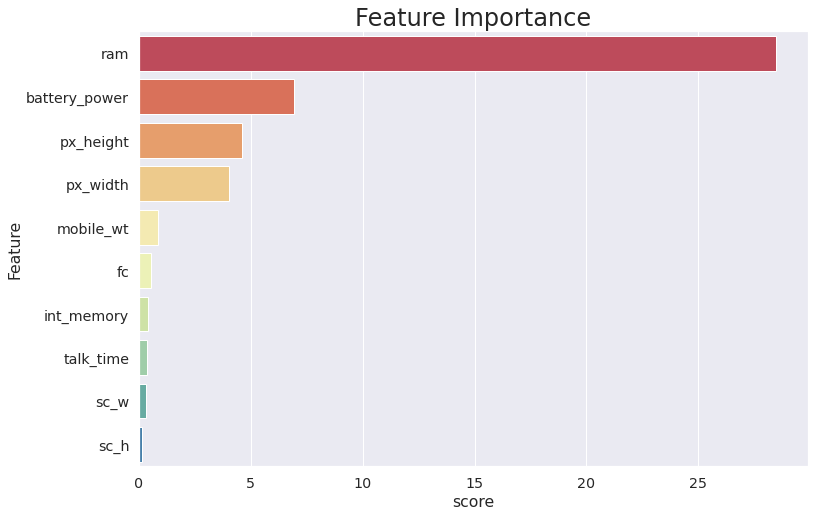

In [ ]:
#Feature importance graph of SVC model
feature_importance_plot(svc_optimal)

### **Observations** - SVC 


* ***Accuracy score on train set is 98% and Test score is 89%.***
***Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.***
* ***After Hyperparameter tuning train accuracy remained almost same  98% and test accuracy score increased to 97%.*** 
*  ***SVM performed very well as compared to other alogorithms.***
* ***In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.***
* ***f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.***

RAM and battery are the two most important features for both SVC and linear regression models

In [ ]:
# Plotting scatter plot to visualize different classes with respect to top two important features

In [ ]:
#Creating data frame of each class
df_a=df[df['price_range']==0]    # creating dataframe of class 0
df_b=df[df['price_range']==1]    #creating dataframe of class 1
df_c=df[df['price_range']==2]    #creating dataframe of class 2
df_d=df[df['price_range']==3]     #creating dataframe of class 3

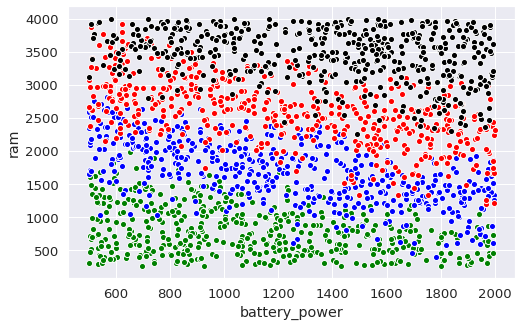

In [ ]:
# Scatter plot that shows class variation with two most important variables in x and y axis
plt.figure(figsize=(8,5))
sns.set(font_scale = 1.2)
sns.scatterplot(y=df_a['ram'],x=df_a['battery_power'],color='green',marker='.',s=150)  
sns.scatterplot(y=df_b['ram'],x=df_b['battery_power'],color='blue',marker='.',s=150)   
sns.scatterplot(y=df_c['ram'],x=df_c['battery_power'],color='red',marker='.',s=150)
sns.scatterplot(y=df_d['ram'],x=df_d['battery_power'],color='black',marker='.',s=150)